# Treatement of the data for a student


In this notebook we create a new class called Student.



## I. Importations of modules and python scripts

In [3]:
# We import python modules
# numpy : a mathematical function that is very useful!
import numpy as np
import os
# size of the plots
from graphs import *
from exo import *

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 20

## II. Definition of a new class called Student

A class is a set of functions.

The first one, called __init__, gathers the different functions which initialise the class: find_log_dir, get_name and create_exos. The class has one attribute called base, "self" being implicit.

Several functions are defined after the init function.


In [1]:
def get_files_directory(directory, pattern="AFC"):
    if directory[-1] != "/":
        directory += "/"
    return [directory + fichier for fichier in os.listdir(directory) if  pattern in fichier]

# On définit la classe Eleve
class Student:
    '''
     This is a description of the class, 
    If you have any problem with it
    you can always write help(Student)
    '''

    def __init__(self, base):
        # Here we define the shared attributes of all the students
        # They all have a path, the base of the directory
        self.base = base
        # We search for the directory that contains the logfiles
        # since they all have logfiles
        self.find_log_dir()
        # All the students have names that we want to retrieve
        self.get_name()
        #self.file = file 
        # All students have done exercises
        self.create_exos()
    
    def create_exos(self):
        # We create tuples which associate a pattern
        # in a file to a specific type of "Exo", 2AFC or 5AFC.
        # There are two elements in this association:
        # a pattern (ex: "2AFC"), and the Class it belongs to (ex: AFC2)
        assos = [("2AFC", AFC2),
                 ("5AFC", AFC5)]
        exos = []
        # For each pattern and class (cl) in the association
        for pattern, cl in assos:
            # We retrieve the paths of the files in the student's 
            # directory in which we can find the pattern
            path_list = get_files_directory(self.directory, pattern=pattern)
            # For each of these paths
            for exo_path in path_list:
                # We associate the path to the type of exercise, to a class
                exo = cl(exo_path)
                # We add this association to a list of exercises
                exos.append(exo)
        # Once the list of exercises is implemented
        # it is associated to its student
        self.exos = exos
        
    def criteria_by_key(self, key, criteria):
        dico = {}
        # Pour chaque exo, on récupère les labels et les values
        for exo in self.exos:
            labels, values = exo.criteria_by_key(key, criteria)
            #print(labels, values)
            # For each label retrieved,
            # we sum up the number of times we entoured it
            # with the number of time we've already encoutered it,
            # but if it is the first time we encouter this label
            # we initialise its value in the dictionary
            for i , label in enumerate(labels):
                if label not in dico.keys():
                    dico[label] = values[i]
                else:
                    dico[label] += values[i]
            
        # We want to return a list of labels
        # and a list of values in a np array
        # for our display function.
        # To do so, we retrieve the keys
        # and values of our dictionary in a np array
        labels = np.array(list(dico.keys()))
        values = np.array(list(dico.values()))
        # If the value is 0, we do nothing
        sel_arr = values != 0
        labels = labels[sel_arr]
        values = values[sel_arr]
        # We return the data
        return labels, values
    
    
    def chart_all_exos(self, key, criteria, title):
        
        for exo in self.exos:
            labels, values = exo.criteria_by_key(key, criteria)
            print(exo.path)
            plot_chart(labels, values, title)
            
    def hist_all_exos(self, key, criteria, title, xlabel, ylabel, xrotation=None, yrotation=None):
        for exo in self.exos:
            labels, values = exo.criteria_by_key(key, criteria)
            print(exo.path)
            plot_hist(labels, values, title, xlabel, ylabel, xrotation=xrotation, yrotation=yrotation)


## III. Use of the previously defined functions to make plots

The function hist_all_exos makes histograms for each exercices for a single students. The criterion, key, title, xlabel and ylabel have been set up, but you can change it to make different histograms.

For each student, their name is printed and the path to the logfile is displayed.


### 1. First we set up a path

In [4]:
dossier_exemple = "log_files/L1/Sarah Moreira_1365881_assignsubmission_file_/logFiles (Sarah Moreira)/logFiles (Sarah Moreira)/"
AFC2_exemple = dossier_exemple + "2AFC_a_Wed_Feb_17_10_18_00_2021.log"
AFC5_exemple = dossier_exemple + "5AFC_1_Sat_Feb_27_09_53_53_2021.log"

### 2. Then we put the attributes (key, criterion, title...) depending on what we want to see

log_files/L1/Sarah Moreira_1365881_assignsubmission_file_/logFiles (Sarah Moreira)/logFiles (Sarah Moreira)/
log_files/L1/Sarah Moreira_1365881_assignsubmission_file_/logFiles (Sarah Moreira)/logFiles (Sarah Moreira)/2AFC_a_Wed_Feb_17_10_18_00_2021.log


ValueError: could not convert string to float: 'a'

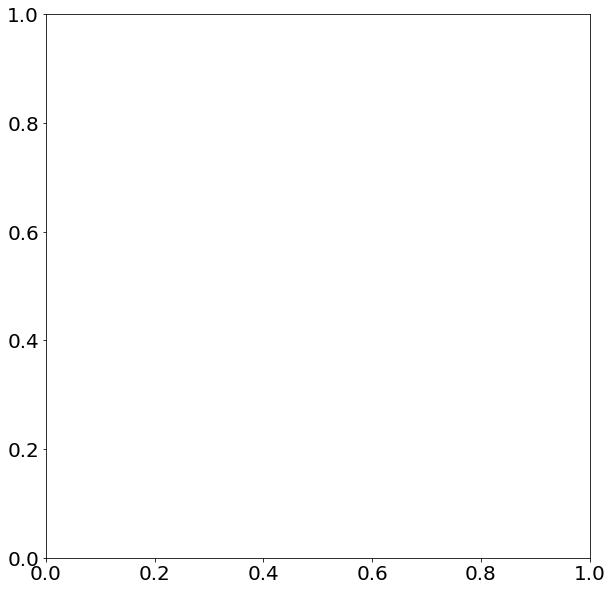

In [8]:
sarah = Eleve(dossier_exemple, "Moreira Sarah")
print(sarah.directory)
sarah.chart_all_exos("Vowel", "Repetitions", "Repetitions per vowel")
sarah.hist_all_exos("Vowel", "Repetitions", "Repetitions per vowel", "Vowel", "Repetitions")
sarah.criteria_by_key("Vowel", "Repetitions")
labels, values = sarah.criteria_by_key("Vowel", "Repetitions")


print("Chart et hist de tout")
plot_chart(labels, values, "Repetitions per vowel for each AFC exercise")
plot_hist(labels, values, "Repetitions per vowel for each AFC exercise", "Vowel", "Repetitions")

ValueError: could not convert string to float: 'a'

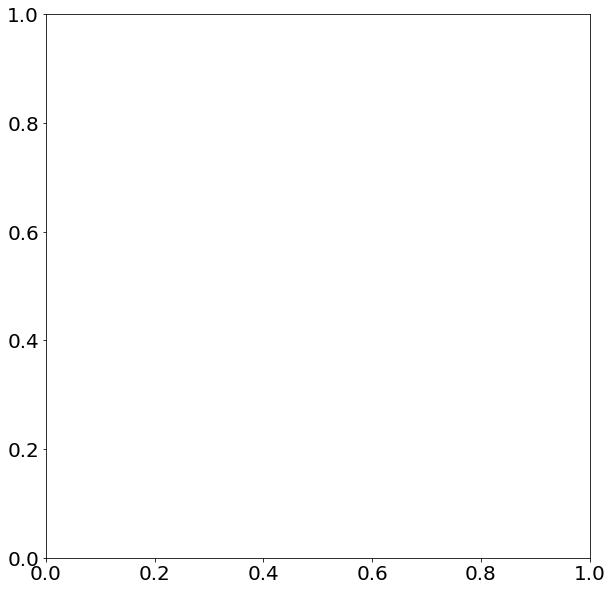

In [9]:
# La variable exo est une instance de AFC2 avec pour paramètre
# le path du fichier d'exercice qui est AFC2_exemple
exo = AFC2(AFC2_exemple)
#exo.display()
labels, values = exo.criteria_by_key("Vowel", "Repetitions")

plot_chart(labels, values, "coucou")

plot_hist(labels, values, "coucou", "x", "y")